# Occupancy Modeling using AI and Python

## Step 0: Setup & Dataset Download

1. Make a copy of this Notebook (File -> Save Copy in Drive)
2. Start to download the dataset by hovering over the cell and clicking the "play" icon in the top left of the cell

In [ ]:
# download camera trap images & metadata
!wget --no-verbose --no-parent --recursive -R "index.html*" -P data "https://catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/"

2025-03-03 05:17:49 URL:https://catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/ [2147] -> "data/catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/index.html.tmp" [1]
2025-03-03 05:17:49 URL:https://catalogue.ceh.ac.uk/robots.txt [780/780] -> "data/catalogue.ceh.ac.uk/robots.txt" [1]
2025-03-03 05:17:49 URL:https://catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/?C=N;O=D [2147] -> "data/catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/index.html?C=N;O=D.tmp" [1]
2025-03-03 05:17:49 URL:https://catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/?C=M;O=A [2147] -> "data/catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/index.html?C=M;O=A.tmp" [1]
2025-03-03 05:17:49 URL:https://catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/?C=S;O=A [2147] -> "data/catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7

### About the Dataset

The dataset we just downloaded is described in:
Barnett, C.L.; Gashchak, S.; Beresford, N.A.; Wood, M.D. (2022). *Wildlife camera trap photographs from the Chornobyl Exclusion Zone, Ukraine (November 2020 - March 2021) following extensive wildfires.* NERC EDS Environmental Information Data Centre. https://doi.org/10.5285/a657ffc3-8f62-458f-bcb7-30e116807174

It is licensed under the terms of the [Open Government Licence](https://eidc.ceh.ac.uk/licences/OGL/plain).

Study area:
![image.png](attachment:image.png)

Some example images:
![Example A](https://catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/Setup2_Site_1/Setup2_Site1_1570/Eurasianelk/IMAG0395.JPG)
![Example B](https://catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/Setup2_Site_1/Setup2_Site1_1570/Greywolf/IMAG0342.JPG)
![Example C](https://catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/Setup2_Site_1/Setup2_Site1_1579/Eurasianlynx/IMAG0038.JPG)

## Step 1: Setup our Classifier

In [ ]:
# install SpeciesNet, a machine learning model to classify species in camera trap images
# until this is supported by the upstream project, we are installing a fork that supports
# outputting logits for each target species. Learn more at:
# https://github.com/google/cameratrapai
!pip install git+https://github.com/timmh/cameratrapai.git

  Cloning https://github.com/timmh/cameratrapai.git to /tmp/pip-req-build-ic2ipkie
  Running command git clone --filter=blob:none --quiet https://github.com/timmh/cameratrapai.git /tmp/pip-req-build-ic2ipkie
  Resolved https://github.com/timmh/cameratrapai.git to commit 42f94c2d98ca501904807ab1002b21fb3ed6f481
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.2 MB/s eta 0:

In [ ]:
# define our species of interest
# go to https://www.kaggle.com/models/google/speciesnet?select=taxonomy_release.txt
# to see the full set of available species
species_of_interest = """
ce9a5481-b3f7-4e42-8b8b-382f601fded0;mammalia;lagomorpha;leporidae;lepus;europaeus;european hare
429257d4-3ef2-47fb-b849-66ee6c107346;mammalia;cetartiodactyla;cervidae;alces;alces;moose
ee8d5a89-f82e-4323-80e2-0ffc9487ebaf;mammalia;carnivora;canidae;canis;lupus;grey wolf
eb3829b0-772e-4088-ae90-f11b9fe38284;mammalia;cetartiodactyla;cervidae;cervus;elaphus;red deer
ac0e8ba7-7261-4d17-8645-11ed3d02165a;mammalia;carnivora;canidae;vulpes;vulpes;red fox
317171d7-d306-4e71-9a4a-33e62012076b;mammalia;cetartiodactyla;cervidae;capreolus;capreolus;european roe deer
19fd235e-d808-4e22-bfae-42491045b763;mammalia;perissodactyla;equidae;equus;ferus;przewalski's horse
ea3fb6be-f489-4c8c-9002-bc2d0a22d007;mammalia;carnivora;felidae;lynx;lynx;eurasian lynx
73baf300-5592-4ab5-9da8-7da898477934;mammalia;carnivora;mustelidae;meles;meles;eurasian badger
d372cda5-a8ca-4b7b-97ed-4e4fab9c9b4b;mammalia;cetartiodactyla;suidae;sus;scrofa;wild boar
746d3e98-64af-4897-9cd3-c09b169a8c69;mammalia;carnivora;canidae;nyctereutes;procyonoides;raccoon dog
0f132580-6fc9-4ffa-8e6d-39cdc00c359e;mammalia;carnivora;mustelidae;lutra;lutra;eurasian otter
"""

# save the list into a text file
with open("target_species.txt", "w") as f:
    f.write(species_of_interest)

## Step 2: Classify our Images

In [ ]:
# run the classifier (this may take a while)
!python -m speciesnet.scripts.run_model \
    --folders data \
    --predictions_json predictions.json \
    --target_species_txt target_species.txt

2025-03-03 05:19:36.028366: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-03 05:19:36.028428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-03 05:19:36.029968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-03 05:19:36.039198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-03 05:19:37.028563: W tensorflow/comp

In [ ]:
# alternatively, if this takes too long, you can download our precomputed predictions
!curl -L "https://www.dropbox.com/scl/fi/diiiwpesewil64uupl43d/predictions.json?rlkey=1j274fbid22l9bmmj1pv3whu3&st=qpinht3o&dl=1" > predictions.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     16      0  0:00:01  0:00:01 --:--:--    16
100 40.7M  100 40.7M    0     0  20.1M      0  0:00:02  0:00:02 --:--:-- 74.6M


# Step 3: Data Preprocessing

In [ ]:
# next, we are importing some libraries that we will need
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load site metadata tables
site_descriptions = pd.read_csv("data/catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/CHAR_Nov_2020_Mar_2021_Camera_Trap_Site_Descriptions.csv")
site_details = pd.read_csv("data/catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/CHAR_Nov_2020_Mar_2021_Camera_Trap_Details.csv")

# merge site metadata tables
site_metadata = pd.merge(
    site_descriptions.rename(columns=lambda c: c.replace(" ", "")),
    site_details.rename(columns=lambda c: c.replace(" ", "")),
    on=["Site", "Camera_Location_Identifier"],
)

site_metadata.head()

,Setup_Number_x,Site,Camera_Location_Identifier,Camera_Location_Latitude_WGS84_Decimal_Degrees,Camera_Location_Longitude_WGS84_Decimal_Degrees,Camera_Location_Description,Ambient_Dose_Rate_At_Camera_Location_Micro_Sievert_Per_Hour_Jun_2020,Description_Of_Animal_Trails_Within_20m_Radius_Of_Camera,Degree_Of_Burn_Of_Area_Affected_By_Fire_Within_200_Metre_Radius_Of_Camera_Location_Jun_2020,Setup_Number_y,Camera_Serial_Number_As_Displayed_On_Images,Folder_Name_Where_Images_Are_Located,Start_Date_Time_Camera_Deployment,End_Date_Time_Camera_Deployment,Number_Of_Days_Camera_In_Operation,Number_Of_Images_Taken,Notes
0,2.0,1.0,1570.0,51.4134,30.1727,Pine (Pinus sylvestris) plantations 40-50 y.o....,1.07,Multiple trails,None (area was not affected by fire),2,848,Setup2_Site1_1570,03/11/2020 09:19,26/03/2021 09:11,143.0,411,NaN
1,2.0,1.0,1571.0,51.4220,30.2029,Peat meadow with birch (20-25 y.o.) and sedge/...,0.72,No visible trails,None (area was not affected by fire),2,310,Setup2_Site1_1571,03/11/2020 17:02,26/03/2021 08:21,143.0,273,Eurasian elk moved the camera
2,2.0,1.0,1572.0,51.4492,30.1445,"Intersect of forest roads, pine (Pinus sylvest...",1.20,Two indistinct trails,None (area was not affected by fire),2,2221,Setup2_Site1_1572,03/11/2020 16:14,26/03/2021 15:09,143.0,378,NaN
3,2.0,1.0,1573.0,51.4616,30.1028,"Intersect of dry ditch, around birch reforesta...",1.26,Indistinct trail,None (area was not affected by fire),2,2234,Setup2_Site1_1573,03/11/2020 14:49,26/03/2021 13:58,143.0,216,NaN
4,2.0,1.0,1574.0,51.4429,30.1180,Dry ditch between pine (Pinus sylvestris) plan...,1.10,"Intersect of two trails, passing over dry ditch",None (area was not affected by fire),2,2310,Setup2_Site1_1574,03/11/2020 15:20,26/03/2021 14:26,143.0,103,NaN


In [ ]:
# convert degree of burn area to numeric
site_metadata["DegreeOfBurnArea"] = site_metadata["Degree_Of_Burn_Of_Area_Affected_By_Fire_Within_200_Metre_Radius_Of_Camera_Location_Jun_2020"].str.split(" ", n=1, expand=True).iloc[:, 0].map({"None": 0, "Low": 1, "High": 2, "Very": 3})

# index site metadata by camera location identifier
site_metadata["Camera_Location_Identifier"] = site_metadata["Camera_Location_Identifier"].astype(int)
site_metadata = site_metadata.set_index("Camera_Location_Identifier").sort_index()

site_metadata.head()

,Setup_Number_x,Site,Camera_Location_Latitude_WGS84_Decimal_Degrees,Camera_Location_Longitude_WGS84_Decimal_Degrees,Camera_Location_Description,Ambient_Dose_Rate_At_Camera_Location_Micro_Sievert_Per_Hour_Jun_2020,Description_Of_Animal_Trails_Within_20m_Radius_Of_Camera,Degree_Of_Burn_Of_Area_Affected_By_Fire_Within_200_Metre_Radius_Of_Camera_Location_Jun_2020,Setup_Number_y,Camera_Serial_Number_As_Displayed_On_Images,Folder_Name_Where_Images_Are_Located,Start_Date_Time_Camera_Deployment,End_Date_Time_Camera_Deployment,Number_Of_Days_Camera_In_Operation,Number_Of_Images_Taken,Notes,DegreeOfBurnArea
Camera_Location_Identifier,,,,,,,,,,,,,,,,,
1539,2.0,3.0,51.2711,29.9985,Edge of grassy meadow with sparse reforestatio...,0.10,One trail,High (almost everything burnt; some bushes and...,2,2309,Setup2_Site3_1539,05/11/2020 11:45,25/03/2021 11:33,140.0,521,NaN,2
1540,2.0,3.0,51.2829,29.9527,Wide clearing along old field road between pin...,0.10,One trail,None (area was not affected by fire),2,9333,Setup2_Site3_1540,23/10/2020 13:47,25/03/2021 13:52,153.0,180,NaN,0
1541,2.0,3.0,51.2879,29.9522,Grassy clearing within pine (Pinus sylvestris...,0.08,Cross of two indistinct trails,None (area was not affected by fire),2,9212,Setup2_Site3_1541,23/10/2020 13:28,20/03/2021 13:32,148.0,411,Issues with the camera switch,0
1542,2.0,3.0,51.2834,29.9258,"Pine (Pinus sylvestris) plantation 20-25 y.o.,...",0.08,Cross of two trails,High (almost everything burnt; some bushes and...,2,2240,Setup2_Site3_1542,23/10/2020 12:58,25/03/2021 14:17,153.0,342,NaN,2
1543,2.0,2.0,51.4322,29.7725,Old forest road in pine (Pinus sylvestris) woo...,0.16,One good trail,Very high (everything burnt and root mat affec...,2,9339,Setup2_Site2_1543,04/11/2020 13:45,23/03/2021 09:05,139.0,132,NaN,3


In [ ]:
# load the image metadata
image_metadata = pd.read_csv("data/catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174/CHAR_Nov_2020_Mar_2021_Camera_Trap_Image_Catalogue.csv")

# parse the date and time
image_metadata["DateTime"] = pd.to_datetime(image_metadata["Date"] + " " + image_metadata["Time"], format="%d/%m/%y %H:%M:%S")

# luckily for us the dataset is fully labeled, to use those labels
# we'll map them to to the taxonomy of the classifier
species_mapping = {
    "Brown hare": "european hare",
    "Eurasian elk": "moose",
    "Grey wolf": "grey wolf",
    "Red deer": "red deer",
    "Red fox": "red fox",
    "Roe deer": "european roe deer",
    "Przewalski's horse": "przewalski's horse",
    "Eurasian lynx": "eurasian lynx",
    "European badger": "eurasian badger",
    "Wild boar": "wild boar",
    "Raccoon dog": "raccoon dog",
    "European otter": "eurasian otter",
}
image_metadata["Species_Common_Name"] = image_metadata["Species_Common_Name"].map(species_mapping)


image_metadata.head()

,Site,Camera_Location_Identifier,Setup_Number,Image_Location_Folder_Name,Image_Filename,Date,Time,Day_Period,Species_Common_Name,Number_Animals_In_Image,Total_Number_Animals_Per_Triggering_Event,Triggering_Event_Number_Sequential,Notes,DateTime
0,1,1570,2,Setup2_Site1_1570,IMAG0001.JPG,03/11/20,09:19:54,day,NaN,n/r,n/r,NaN,NaN,2020-11-03 09:19:54
1,1,1570,2,Setup2_Site1_1570,IMAG0002.JPG,03/11/20,09:19:56,day,NaN,n/r,n/r,NaN,NaN,2020-11-03 09:19:56
2,1,1570,2,Setup2_Site1_1570,IMAG0003.JPG,03/11/20,09:19:56,day,NaN,n/r,n/r,NaN,NaN,2020-11-03 09:19:56
3,1,1570,2,Setup2_Site1_1570,IMAG0004.JPG,05/11/20,08:24:10,day,red deer,1,1,1.0,1 ad m,2020-11-05 08:24:10
4,1,1570,2,Setup2_Site1_1570,IMAG0005.JPG,05/11/20,08:24:12,day,red deer,1,NaN,1.0,NaN,2020-11-05 08:24:12


In [ ]:
# let's parse the classifier predictions into our image metadata

with open("predictions.json", "r") as f:
    predictions = json.load(f)


num_failures = 0
for prediction in predictions["predictions"]:

    # skip failed predictions
    if "failures" in prediction:
        num_failures += 1
        continue

    # extract the filename from the full filepath
    filename = prediction["filepath"].split(os.sep)[-1]

    # extract the site and location from the full filepath
    setup, site, location = prediction["filepath"].split(os.sep)[-3].split("_")
    site = int(site.replace("Site", ""))
    location = int(location)

    # find the image in the metadata
    image_idx = (
        (image_metadata["Site"] == site) &
        (image_metadata["Camera_Location_Identifier"] == location) &
        (image_metadata["Image_Filename"] == filename)
    )

    assert image_idx.sum() == 1, f"Found {image_idx.sum()} images with the same filename in the metadata"

    # add classification logits to the image metadata
    for label, logit in zip(prediction["classifications"]["target_classes"], prediction["classifications"]["target_logits"]):
        common_name = label.split(";")[-1]
        image_metadata.loc[image_idx, common_name] = logit


print(f"Skipped {num_failures} out of {len(predictions['predictions'])} images with failed predictions")

Skipped 0 out of 10941 images with failed predictions


In [ ]:
# print the set of species we've classified
print("Available species:\n" + "\n".join(species_mapping.values()))

# set our target species
# feel free to play around with this!
target_species = "grey wolf"
print(f"Target species: {target_species}")

# set our classifier logit threshold (we will tune this later)
threshold = 0

Available species:
european hare
moose
grey wolf
red deer
red fox
european roe deer
przewalski's horse
eurasian lynx
eurasian badger
wild boar
raccoon dog
eurasian otter
Target species: grey wolf


In [ ]:
def get_observations(image_metadata, threshold):

    # threshold our classification scores of the target species to obtain binary observations
    observations = image_metadata[["DateTime", "Camera_Location_Identifier"]].copy()
    observations["Observed"] = image_metadata[target_species] >= threshold

    # define our aggregation window
    aggregation_window = "W"  # "ME" for monthly, "W" for weekly, "D" for daily

    # sum observations over the specified window
    observations = observations.groupby([pd.Grouper(key="DateTime", freq=aggregation_window), "Camera_Location_Identifier"]).sum(numeric_only=True).reset_index()

    # pivot the table to have datetime as columns and location as rows
    observations = observations.pivot(columns="DateTime", index="Camera_Location_Identifier", values="Observed").sort_index()

    # binarize observations
    observations = (observations >= 1) * 1

    return observations


observations = get_observations(image_metadata, threshold)

# show the first few rows
observations.head()

DateTime,2020-07-05,2020-10-25,2020-11-01,2020-11-08,2020-11-15,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,...,2021-01-24,2021-01-31,2021-02-07,2021-02-14,2021-02-21,2021-02-28,2021-03-07,2021-03-14,2021-03-21,2021-03-28
Camera_Location_Identifier,,,,,,,,,,,,,,,,,,,,,
1539,0,0,0,1,1,1,0,1,1,1,...,0,1,1,0,0,0,0,1,1,1
1540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1541,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
1542,0,0,1,1,1,1,1,1,0,0,...,1,1,1,1,0,0,1,0,1,1
1543,0,0,0,1,1,1,1,1,1,1,...,1,1,1,0,0,0,1,1,0,0


## Step 4: Fit Occupancy Models

In [ ]:
# first, we are going to install biolith using pip
!pip install biolith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.9/174.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.8/360.8 kB 21.3 MB/s eta 0:00:00


sample: 100%|██████████| 2000/2000 [00:16<00:00, 119.39it/s, 7 steps of size 5.64e-01. acc. prob=0.94]



                          mean       std    median      5.0%     95.0%     n_eff     r_hat
             alpha_0     -2.34      0.25     -2.32     -2.75     -1.94    755.60      1.00
              beta_0     -0.87      0.41     -0.86     -1.48     -0.19    786.55      1.00
              beta_1     -0.87      0.48     -0.83     -1.61     -0.09    582.25      1.00
  prob_fp_unoccupied      0.46      0.02      0.45      0.42      0.49    861.07      1.01

Number of divergences: 0


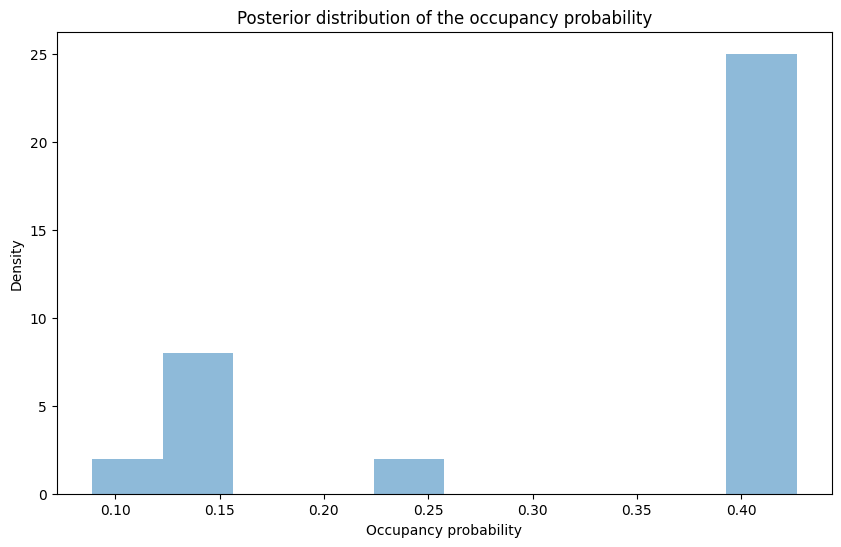

In [ ]:
from biolith.models import occu
from biolith.utils import fit


# only keep site covariates of sites that have observations
site_covariates = site_metadata[site_metadata.index.isin(observations.index)].copy()

# use a single site covariate
# alternatively, you can use any combination of:
# "DegreeOfBurnArea"
# "Camera_Location_Latitude_WGS84_Decimal_Degrees"
# "Camera_Location_Longitude_WGS84_Decimal_Degrees"
# "Ambient_Dose_Rate_At_Camera_Location_Micro_Sievert_Per_Hour_Jun_2020"
site_covariates = site_covariates[["DegreeOfBurnArea"]]

# normalize site covariates
site_covariates = (site_covariates - site_covariates.mean()) / site_covariates.std()

# we will not use observation covariates
observation_covariates = np.zeros((observations.shape[0], observations.shape[1], 0))

# fit model
results = fit(occu, site_covs=site_covariates, obs_covs=observation_covariates, obs=observations, false_positives_unoccupied=True)

# print summary statistics
results.mcmc.print_summary()

# plot the posterior distribution of the occupancy probability
plt.figure(figsize=(10, 6))
plt.hist(results.samples["psi"].mean(axis=0), alpha=0.5)
plt.xlabel("Occupancy probability")
plt.ylabel("Density")
plt.title("Posterior distribution of the occupancy probability")
plt.show()

In [ ]:
# let's define a function to sample images uniformly across the target species logits
def uniform_sample_by_column(df, column, n_samples, n_bins=10, random_state=42):

    # filter to rows that have a value in the column
    valid_df = df[df[column].notna()]

    if valid_df.empty:
        return pd.DataFrame()

    # create bins across the range of values
    bins = np.linspace(valid_df[column].min(), valid_df[column].max(), n_bins+1)
    valid_df['bin'] = pd.cut(valid_df[column], bins=bins)

    # sample equally from each bin
    samples_per_bin = max(1, int(n_samples / n_bins))

    sampled_rows = []
    for _, bin_group in valid_df.groupby('bin'):
        if len(bin_group) > 0:
            n_to_sample = min(samples_per_bin, len(bin_group))
            sampled_rows.append(bin_group.sample(n_to_sample, random_state=random_state))

    # combine and trim to requested sample size
    result = pd.concat(sampled_rows).drop('bin', axis=1)
    if len(result) > n_samples:
        result = result.sample(n_samples, random_state=random_state)

    return result

# sample some rows uniformly across the target species values
n_samples = 20
labeled_data = uniform_sample_by_column(image_metadata, target_species, n_samples)

# visualize the images in the uniform sample
for idx, row in labeled_data.iterrows():

    try:
        filepath = glob.glob(os.path.join(
            "data/catalogue.ceh.ac.uk/datastore/eidchub/a657ffc3-8f62-458f-bcb7-30e116807174",
            f"Setup2_Site_{row['Site']}",
            row["Image_Location_Folder_Name"],
            "*",
            row["Image_Filename"],
        ))[0]

        image = plt.imread(filepath)
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"logit({target_species}) = {row[target_species]:.2f}, label = {row['Species_Common_Name']}")
        plt.show()
    except:
        print(f"Failed to visualize image {idx}")

labeled_data


Failed to visualize image 1354
Failed to visualize image 485
Failed to visualize image 1569
Failed to visualize image 11307
Failed to visualize image 8507
Failed to visualize image 9888
Failed to visualize image 7089
Failed to visualize image 4473
Failed to visualize image 10676
Failed to visualize image 5204
Failed to visualize image 5054
Failed to visualize image 6089
Failed to visualize image 6373
Failed to visualize image 11105
Failed to visualize image 2651
Failed to visualize image 4826
Failed to visualize image 2296
Failed to visualize image 6056
Failed to visualize image 4836
Failed to visualize image 10017


<ipython-input-29-e3847aec8044>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['bin'] = pd.cut(valid_df[column], bins=bins)
<ipython-input-29-e3847aec8044>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, bin_group in valid_df.groupby('bin'):


,Site,Camera_Location_Identifier,Setup_Number,Image_Location_Folder_Name,Image_Filename,Date,Time,Day_Period,Species_Common_Name,Number_Animals_In_Image,...,grey wolf,red deer,red fox,european roe deer,przewalski's horse,eurasian lynx,eurasian badger,wild boar,raccoon dog,eurasian otter
1354,1,1574,2,Setup2_Site1_1574,IMAG0077.JPG,10/01/21,08:56:40,day,moose,1,...,-6.095508,-1.427937,-6.202192,-5.417506,-6.109603,-6.891599,-10.153573,-2.136859,-8.940852,-7.634701
485,1,1571,2,Setup2_Site1_1571,IMAG0075.JPG,15/11/20,10:45:46,day,moose,1,...,-5.475604,-1.263532,-5.579913,-5.662465,-3.139377,-6.858280,-6.956910,-1.687509,-5.429670,-6.616420
1569,1,1576,2,Setup2_Site1_1576,IMAG0189.JPG,22/03/21,19:54:52,night,european hare,NaN,...,-3.470275,0.527674,-3.777267,-5.183406,-1.475654,-5.256721,-6.293046,1.874333,-5.276560,-7.255018
11307,3,1568,2,Setup2_Site3_1568,IMAG0359.JPG,28/01/21,11:04:18,day,red deer,1,...,-3.356358,13.706700,-0.227272,5.643244,-5.047009,-1.419014,-3.121056,-0.007522,-2.090622,-3.847372
8507,3,1548,2,Setup2_Site3_1548,IMAG0105.JPG,16/03/21,09:50:40,day,red deer,3,...,-1.705265,11.002221,0.554000,3.856802,-2.430814,-3.210358,-3.120899,-0.197437,-3.034195,-5.266563
9888,3,1554,2,Setup2_Site3_1554,IMAG0272.JPG,26/12/20,23:52:02,night,european hare,1,...,-0.909234,0.039891,1.105488,0.777888,-3.370949,-2.600191,-1.208645,1.053756,-2.671934,-5.964046
7089,3,1539,2,Setup2_Site3_1539,IMAG0141.JPG,10/11/20,04:07:50,night,european hare,NaN,...,0.224197,2.934176,2.062465,2.683948,0.078570,-4.684442,0.180099,5.079820,-3.540367,-4.534907
4473,2,1558,2,Setup2_Site2_1558,IMAG0396.JPG,28/01/21,18:46:26,night,moose,1,...,0.036259,7.493061,1.468808,4.900043,0.971955,-3.269840,-2.083843,2.274222,-3.177868,-4.779065
10676,3,1566,2,Setup2_Site3_1566,IMAG0466.JPG,24/01/21,15:32:28,day,european roe deer,1,...,2.098081,3.092757,1.937569,10.787370,-4.915802,-2.204696,-2.709766,-0.575071,-2.836592,-3.676424
5204,2,1560,2,Setup2_Site2_1560,IMAG0101.JPG,25/10/20,07:56:54,day,european roe deer,2,...,1.477456,4.265271,1.272412,9.639040,-3.009945,-2.826577,-1.149578,0.466566,-2.084021,-3.539177


In [ ]:
# get a sorted list of all possible thresholds
possible_thresholds = sorted(image_metadata[target_species].unique())

# initialize variables to keep track of the best threshold and F1 score
best_f1 = float("-inf")
best_thresholds = []

# loop through all possible thresholds
for candidate_threshold in possible_thresholds:

    # see which labeled images would be predicted as positives and negatives given the candidate threshold
    predicted_positives = labeled_data[target_species] >= candidate_threshold
    predicted_negatives = ~predicted_positives

    # see which labeled images are actually positives and negatives
    true_positives = labeled_data["Species_Common_Name"] == target_species
    true_negatives = ~true_positives

    # calculate precision and recall
    precision = (predicted_positives & true_positives).sum() / (predicted_positives.sum() if predicted_positives.sum() > 0 else 1)
    recall = (predicted_positives & true_positives).sum() / (true_positives.sum() if true_positives.sum() > 0 else 1)

    # calculate F1 score
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # update the best threshold and F1 score if the current threshold is better
    if f1 == best_f1:
        best_thresholds.append(candidate_threshold)
    elif f1 > best_f1:
        best_f1 = f1
        best_thresholds = [candidate_threshold]


# average over the best thresholds to get a single threshold
best_threshold = np.mean(best_thresholds)

# print the best threshold and F1 score
print(f"Best threshold: {best_threshold:.2f} at F1 score: {best_f1:.2f}")

Best threshold: 5.05 at F1 score: 0.93


In [ ]:
# again, convert the image metadata to binary observations,
# but this time using our tuned threshold
observations = get_observations(image_metadata, best_threshold)

sample: 100%|██████████| 2000/2000 [00:11<00:00, 171.97it/s, 7 steps of size 5.83e-01. acc. prob=0.93]



                          mean       std    median      5.0%     95.0%     n_eff     r_hat
             alpha_0     -4.50      0.47     -4.49     -5.31     -3.78    750.48      1.00
              beta_0      0.45      0.36      0.43     -0.11      1.02    989.29      1.00
              beta_1     -0.11      0.35     -0.10     -0.64      0.48   1233.37      1.00
  prob_fp_unoccupied      0.19      0.02      0.19      0.15      0.22    951.07      1.00

Number of divergences: 0


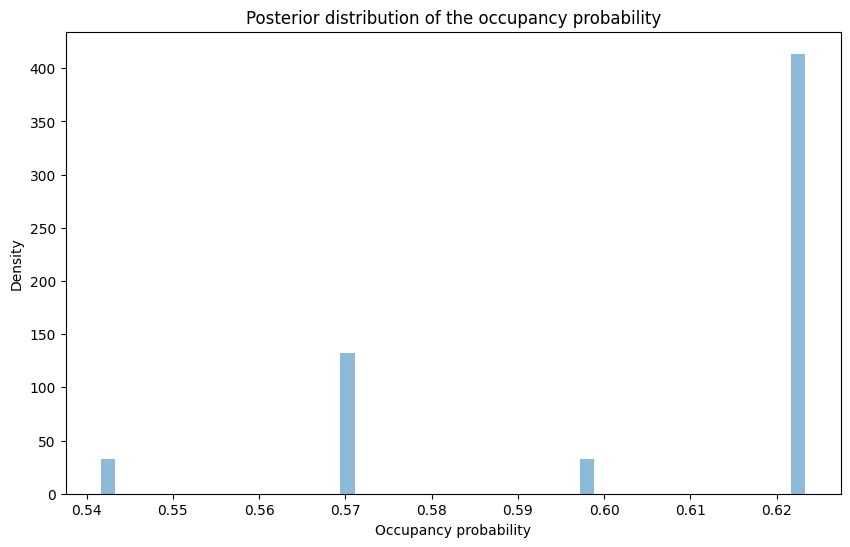

In [ ]:
# fit model
results = fit(occu, site_covs=site_covariates, obs_covs=observation_covariates, obs=observations, false_positives_unoccupied=True)

# print summary statistics
results.mcmc.print_summary()

# plot the posterior distribution of the occupancy probability
plt.figure(figsize=(10, 6))
plt.hist(results.samples["psi"].mean(axis=0), bins=50, density=True, alpha=0.5)
plt.xlabel("Occupancy probability")
plt.ylabel("Density")
plt.title("Posterior distribution of the occupancy probability")
plt.show()

In [ ]:
# since we have the true labels, we can check our estimate of the false positive rate
predicted_positives = image_metadata[target_species] >= best_threshold
predicted_negatives = ~predicted_positives

# see which labeled images are actually positives and negatives
true_positives = image_metadata["Species_Common_Name"] == target_species
true_negatives = ~true_positives

# calculate precision and recall
gt_false_positive_rate = (predicted_positives & true_negatives).sum() / true_negatives.sum()
print(f"Ground truth false positive rate: {gt_false_positive_rate:.4f}")

Ground truth false positive rate: 0.0032


In [ ]:
# install arviz to explore the model some more
!pip install arviz
import arviz as az

/usr/local/lib/python3.11/dist-packages/arviz/data/base.py:272: UserWarning: More chains (1000) than draws (24). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/data/base.py:272: UserWarning: More chains (1000) than draws (37). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data

array([[<Axes: title={'center': 'cov_state_intercept'}>,
        <Axes: title={'center': 'cov_state_intercept'}>],
       [<Axes: title={'center': 'cov_state_DegreeOfBurnArea'}>,
        <Axes: title={'center': 'cov_state_DegreeOfBurnArea'}>],
       [<Axes: title={'center': 'prob_fp_unoccupied'}>,
        <Axes: title={'center': 'prob_fp_unoccupied'}>]], dtype=object)

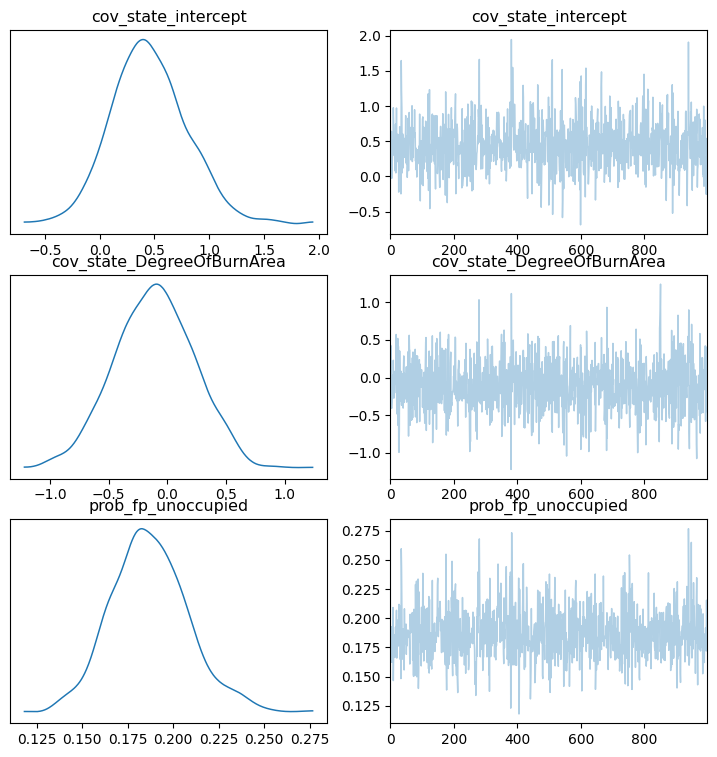

In [ ]:
# plot a subset of traces (can be slow)
idata = az.from_dict(posterior=results.samples)
az.plot_trace(idata, var_names=['cov_state_intercept', 'cov_state_DegreeOfBurnArea', 'prob_fp_unoccupied'], figsize=(9,9))